# Analyses of multiple large populations using SAMPLED DATA

In [1]:
import pickle
import gzip
import numpy as np
import pandas as pd
from scipy import stats
from tqdm import tqdm

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Load data

In [4]:
%%time

# SELECTION = 0.3 POPULATIONS
prefix = '../../Simulations/Ensemble-simulations/saved_simulations/large-selection_0p3-1000_MultiSim/'
selection_0p3 = []

for i in tqdm(range(1000)):
    file_path = prefix + 'population_' + '%s' %(i) + '.pkl.gz'
    data = pd.read_pickle(file_path, compression='gzip')
    selection_0p3.append(data)
print(len(selection_0p3))
print(type(selection_0p3[0]))

100%|██████████| 1000/1000 [03:35<00:00,  4.64it/s]

1000
<class 'pandas.core.frame.DataFrame'>
CPU times: user 1min 54s, sys: 54.8 s, total: 2min 49s
Wall time: 3min 35s


In [5]:
selection_0p3[0].head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color
Clone ID,,,,,,,,,
A,0,0.001,538756,116402657,1.000000,0,1550,1.000000,"(0, 0, 0)"
A.0,11,0.001,102323842,115494601,0.992199,1,148113,2.349118,"(232, 107, 35)"
A.1,13,0.001,0,0,0.000000,1,0,0.573159,"(99, 205, 83)"
A.2,14,0.001,436,436,0.000004,1,0,0.949961,"(27, 151, 114)"
A.3,15,0.001,12521,12655,0.000109,1,23,1.447556,"(175, 205, 33)"


## Sample data

In [6]:
sample_size=10**6
detection_limit=100

In [7]:
%%time
for i in tqdm(range(len(selection_0p3))):
    selection_0p3[i] = sample(selection_0p3[i], sample_size, detection_limit)
print(len(selection_0p3))

100%|██████████| 1000/1000 [57:11<00:00,  3.43s/it] 

1000
CPU times: user 43min 25s, sys: 56.6 s, total: 44min 21s
Wall time: 57min 11s


In [8]:
selection_0p3[0].head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color,sampled_size,sampled_fam_size,sampled_AF
Clone ID,,,,,,,,,,,,
A,0,0.001,538756,116402657,1.000000,0,1550,1.000000,"(0, 0, 0)",4671,1000000,1.000000
A.0,11,0.001,102323842,115494601,0.992199,1,148113,2.349118,"(232, 107, 35)",883490,992203,0.992203
A.2,14,0.001,436,436,0.000004,1,0,0.949961,"(27, 151, 114)",2,2,0.000002
A.3,15,0.001,12521,12655,0.000109,1,23,1.447556,"(175, 205, 33)",118,118,0.000118
A.5,16,0.001,2989,3056,0.000026,1,7,1.500484,"(128, 111, 251)",26,26,0.000026


## Maximum allele frequencies

In [9]:
%%time
selection_0p3_MaxAFs = get_max_AFs(selection_0p3, sampled=True)

CPU times: user 1.83 s, sys: 1.38 s, total: 3.21 s
Wall time: 3.49 s


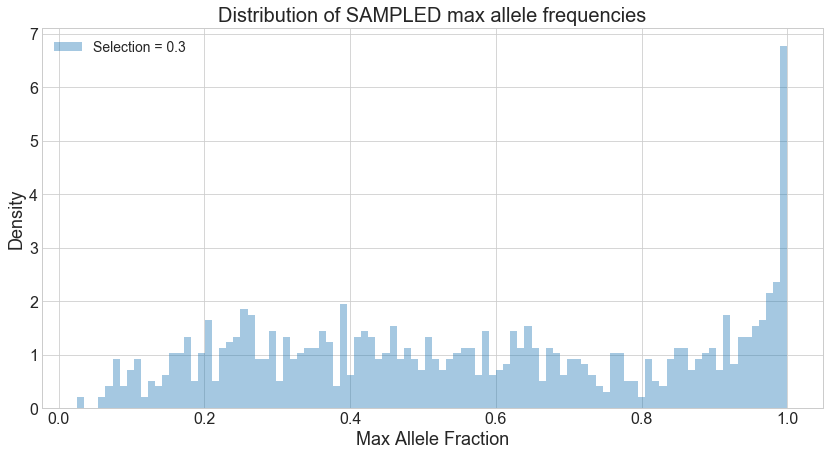

In [10]:
sns.distplot(selection_0p3_MaxAFs, bins=100, norm_hist=True, kde=False, label="Selection = 0.3");
plt.title('Distribution of SAMPLED max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p3-MaxAFs.png')
plt.show()

## Heterogeneity

In [11]:
%%time
selection_0p3_H = get_heterogeneity(selection_0p3, sampled=True)

CPU times: user 1.03 s, sys: 6.54 ms, total: 1.04 s
Wall time: 1.04 s


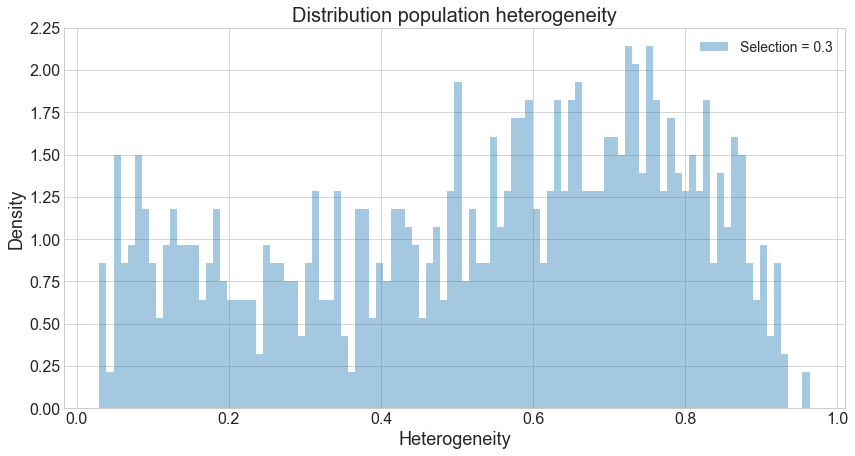

In [12]:
sns.distplot(selection_0p3_H, bins=100, norm_hist=True, kde=False, label="Selection = 0.3");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p3-Heterogeneity.png')
plt.show()

## Mutational burden (number of mutations distrbution)

In [13]:
%%time
selection_0p3_mut_distr = get_mutation_distributions(selection_0p3, sampled=True)

CPU times: user 55.5 s, sys: 217 ms, total: 55.8 s
Wall time: 55.7 s


In [14]:
selection_0p3_mut_distr.to_csv('../Analysis-Data/SAMPLED-Large-1000_sim-selection_0p3_mut_distr.csv')

In [15]:
selection_0p3_avg_nmd = selection_0p3_mut_distr.mean()
selection_0p3_std_nmd = selection_0p3_mut_distr.std()

In [16]:
%%time
selection_0p3_avg_num_mut = avg_num_mutations(selection_0p3_avg_nmd)

CPU times: user 716 µs, sys: 80 µs, total: 796 µs
Wall time: 753 µs


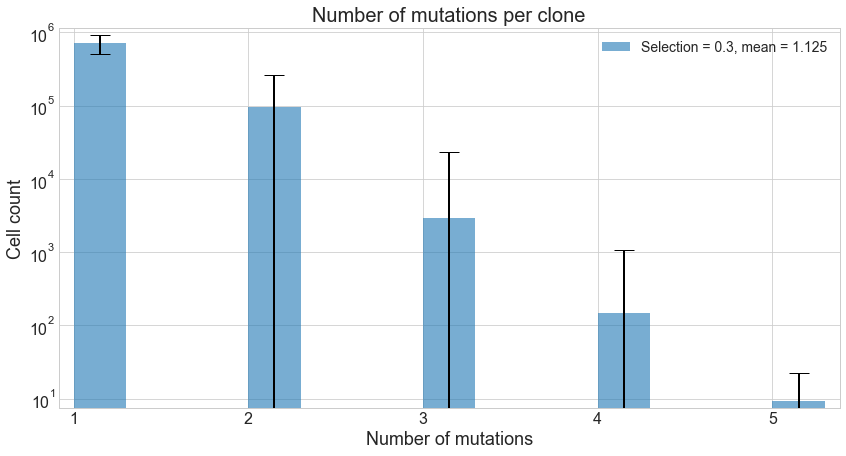

In [17]:
selection_0p3_errors = selection_0p3_std_nmd.values

plt.bar(left=selection_0p3_avg_nmd.index+0.15, height=selection_0p3_avg_nmd.values, width=0.3, alpha=0.6, 
        align='center', yerr=selection_0p3_errors, capsize=10, 
        label="Selection = 0.3, mean = %s" %(round(selection_0p3_avg_num_mut, 3)));

plt.title("Number of mutations per clone");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(selection_0p3_avg_nmd.index));
plt.margins(0.02);
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p3-Num_mutations.png')
plt.show()

## Total number of mutations

In [18]:
%%time
selection_0p3_total_m = get_total_mutations(selection_0p3, det_lim=1)

CPU times: user 710 ms, sys: 4.68 ms, total: 715 ms
Wall time: 712 ms


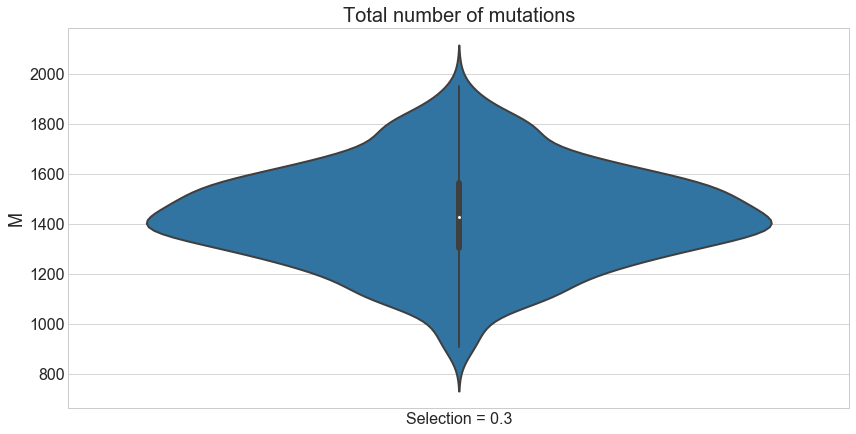

In [19]:
sns.violinplot(data=[selection_0p3_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.xticks([0], ["Selection = 0.3"]);
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p3-Total_num_mutations.png')
plt.show()

## Errors in reconstruction of mutational timeline

Make sure that the vaue for **alpha** is correct!

In [20]:
alpha = 0.3

In [21]:
%%time
selection_0p3_rec_errors = get_reconstruction_errors(selection_0p3, alpha, sampled=True)

CPU times: user 2min 9s, sys: 703 ms, total: 2min 10s
Wall time: 2min 11s


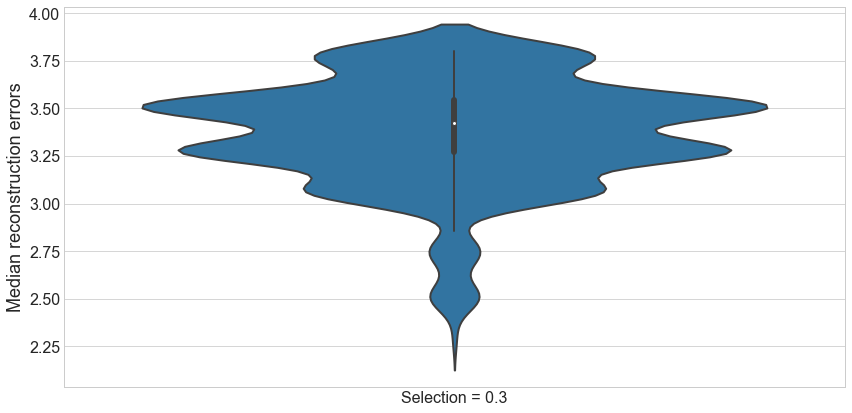

In [22]:
sns.violinplot(data=[selection_0p3_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.xticks([0], ["Selection = 0.3"]);
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p3-Rec_errors.png')
plt.show()

## Export data

In [23]:
d = pd.DataFrame()
d["selection_0p3_MaxAFs"] = selection_0p3_MaxAFs
d["selection_0p3_H"] = selection_0p3_H
d["selection_0p3_total_m"] = selection_0p3_total_m
d["selection_0p3_rec_errors"] = selection_0p3_rec_errors

d.to_csv('../Analysis-Data/SAMPLED-Large-selection_0p3-1000_sim-Analyzed_data.csv')